# Introduction to regression with Neural Networks in tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

2.4.1


## Create data to view and fit

In [2]:
#import necessary packages
import numpy as np
import matplotlib.pyplot as plt

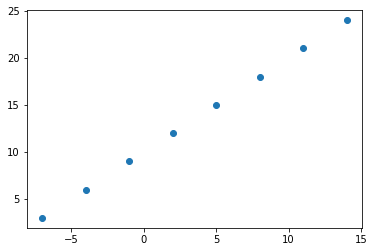

In [3]:
#Create input features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#visualize the data
plt.scatter(X,y)

## Creating and training the neural network

In [4]:
#first we must convert all our numpy arrays into tensors
X = tf.constant(tf.cast(X, dtype=tf.float32))
y = tf.constant(tf.cast(y, dtype=tf.float32))

In [5]:
tf.random.set_seed(42)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer = 'sgd',
    loss = 'mae',
    metrics=["mae"]
)

# This builds the model for the first time:
model.fit(X, y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 587ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 10.9748 - mae: 10.9748


In [6]:
#make a prediction
model.predict([14.0])

array([[10.480841]], dtype=float32)

## Ways of improving the model accuracy (Hyper parameters)
#### 1. Creating the model 
* Adding more layers.
* Adding more hidden units or neurons.
* Change the activation function.

#### 2. Compliling the model 
* Change the optimization function.
* Change the learning rate.
* Change the loss function.

#### 3. Fitting the model 
* Adding more epochs or training the data for a longer period.
* Adding more training data.


In [7]:
### Trying to improve our model accuracy
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50,
                          activation = None),

    tf.keras.layers.Dense(1)
])

model.compile(
    loss = 'mae',
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics = ['mae']
)

model.fit(X,y, epochs=100, validation_split = 0.1
         
         )

Epoch 1/100
1/1 [==============================] - 1s 587ms/step - loss: 12.6552 - mae: 12.6552 - val_loss: 26.0992 - val_mae: 26.0992
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 12.2181 - mae: 12.2181 - val_loss: 23.6140 - val_mae: 23.6140
Epoch 3/100
1/1 [==============================] - 0s 44ms/step - loss: 11.7811 - mae: 11.7811 - val_loss: 21.1247 - val_mae: 21.1247
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 11.3431 - mae: 11.3431 - val_loss: 18.6227 - val_mae: 18.6227
Epoch 5/100
1/1 [==============================] - 0s 30ms/step - loss: 10.9020 - mae: 10.9020 - val_loss: 16.0989 - val_mae: 16.0989
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 10.4561 - mae: 10.4561 - val_loss: 13.5454 - val_mae: 13.5454
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 10.0036 - mae: 10.0036 - val_loss: 10.9553 - val_mae: 10.9553
Epoch 8/100
1/1 [==============================] - 0s 30ms/st

1/1 [==============================] - 0s 31ms/step - loss: 0.8220 - mae: 0.8220 - val_loss: 0.2548 - val_mae: 0.2548
Epoch 64/100
1/1 [==============================] - 0s 32ms/step - loss: 0.7288 - mae: 0.7288 - val_loss: 0.2557 - val_mae: 0.2557
Epoch 65/100
1/1 [==============================] - 0s 26ms/step - loss: 0.7018 - mae: 0.7018 - val_loss: 0.2656 - val_mae: 0.2656
Epoch 66/100
1/1 [==============================] - 0s 27ms/step - loss: 0.5578 - mae: 0.5578 - val_loss: 0.1583 - val_mae: 0.1583
Epoch 67/100
1/1 [==============================] - 0s 27ms/step - loss: 0.3232 - mae: 0.3232 - val_loss: 0.4040 - val_mae: 0.4040
Epoch 68/100
1/1 [==============================] - 0s 29ms/step - loss: 0.2160 - mae: 0.2160 - val_loss: 0.1395 - val_mae: 0.1395
Epoch 69/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0751 - mae: 0.0751 - val_loss: 0.1391 - val_mae: 0.1391
Epoch 70/100
1/1 [==============================] - 0s 27ms/step - loss: 0.2268 - mae: 0.2268 - 

In [8]:
model.predict([14.0])

array([[24.26979]], dtype=float32)

# Evaluating model performace

In [9]:
#Making a bigger dataset
X =tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [10]:
#Making the labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

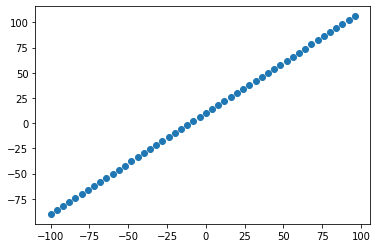

In [11]:
#Vizualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [12]:
#Checking the size of our dataset
len(X)

50

In [13]:
#Split the data into trainning and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train),len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualize the data

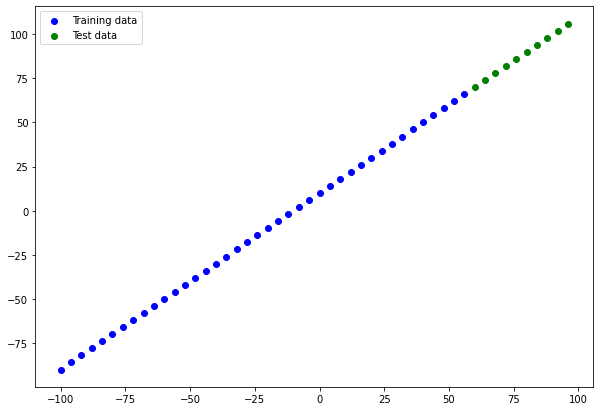

In [14]:
plt.figure(figsize=(10,7))

#plot the training data in blue
plt.scatter(X_train,y_train, c="b", label="Training data")
plt.scatter(X_test,y_test, c="g", label="Test data")
#show the legend
plt.legend()


## Create model

In [15]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], name = "hidden_layer_1", activation=None),
    tf.keras.layers.Dense(1, name = "output_layer")
], name="my_neural_net")

model.compile(
loss = tf.keras.losses.mae,
optimizer =tf.keras.optimizers.Adam(0.01),
metrics = ["mae"]
)


## Visualize your model

In [16]:
## Using the model summary
model.summary()

Model: "my_neural_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 50)                100       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


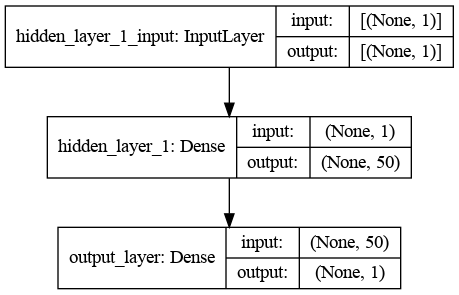

In [17]:
##Drawing a pictorial representation of our model
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True) #to_file= this param can be used to save the image as a file

In [18]:
##Train the model
model.fit(X_train,y_train, verbose=0, epochs = 100)

## Visualize the model predictions

In [19]:
y_pred = model.predict(X_test)
y_pred

array([[ 70.64056 ],
       [ 74.67837 ],
       [ 78.71616 ],
       [ 82.75396 ],
       [ 86.79176 ],
       [ 90.829575],
       [ 94.86738 ],
       [ 98.90518 ],
       [102.94297 ],
       [106.98078 ]], dtype=float32)

In [20]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [21]:
#Lets create a plotting function because we are going to resue this feature
#multiple times
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
    """
    plots training data, test data and compares predictions to the 
    ground truth labels
    """
    plt.figure(figsize=(10,7))
    
    #plot training data in blue
    plt.scatter(train_data,train_labels, c="b", label="Training data")
    
    #plot testing data in green
    plt.scatter(test_data,test_labels, c="g", label="Testing data")
    
    #plot models predictions in red
    plt.scatter(test_data,predictions, c="r", label="Predictions")
    plt.legend()
    

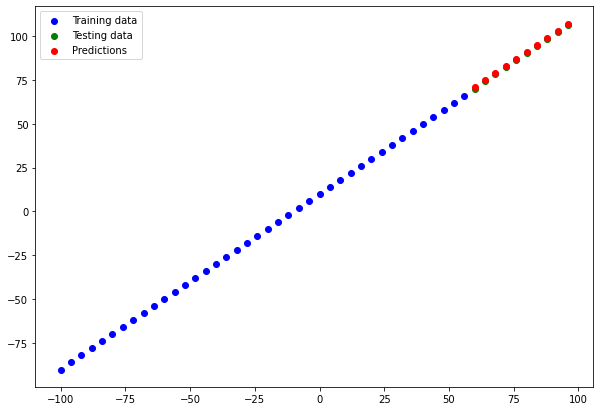

In [22]:
plot_predictions()

## Evaluating our model predictions using Regression Evaluation metrics.
### The commmonly used Regression Evaluation Metrics are:
* **Mean Absolute Error (MAE)** - We calculate the absolute error (we take the positive value even if negative) between each of our model's prediction, and its corresponding actual value. Then we find the average of the error to get MAE value. **WHEN TO USE:** Great starter metric for any regression problem.
* **Mean Square Error (MSE)** - Similar to the MAE but in this method, we square the Average Errors.**WHEN TO USE:** When larger errors are more significant then the smaller errors.
* **Huber** Its a combination of MSE and MAE. It is less sensitive to outliers than MSE.


In [23]:
## Evaluate the model
## It returns the loss value and the metrics value for our models in test mode
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 66ms/step - loss: 0.8107 - mae: 0.8107


[0.8106697201728821, 0.8106697201728821]

In [24]:
##Using the Other method to calculate the metrics
mae = tf.metrics.mean_absolute_error( 
    y_true=y_test,
    y_pred=y_pred
)
mae # we do not get a single mae value as above cell because, the y_pred(10,1) and y_test(10,)
#have different dimensions or shapes

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.487555 , 14.39298  , 12.113535 , 10.649208 , 10.       ,
       10.165915 , 11.146952 , 12.9431095, 15.554377 , 18.980782 ],
      dtype=float32)>

In [25]:
y_pred.shape

(10, 1)

In [26]:
y_test.shape

TensorShape([10])

In [27]:
#We remove the single or 1 dimension in y_pred by using the tf.squeeze method so that both the two tensors will
#have the same shape hence give us a single mae value as shown below
mae1 = tf.metrics.mean_absolute_error(
    y_true=y_test,
    y_pred=tf.squeeze(y_pred)

)
mae1

<tf.Tensor: shape=(), dtype=float32, numpy=0.8106697>

In [28]:
#Calculate the mean square error
mse1 = tf.metrics.mean_squared_error(
    y_true=y_test,
    y_pred=tf.squeeze(y_pred)
)
mse1

<tf.Tensor: shape=(), dtype=float32, numpy=0.6689749>

In [29]:
## Making functions for reusing MSE and MAE
def mae(y_true=y_test,y_pred=y_pred):
    return tf.metrics.mean_absolute_error(
        y_true,tf.squeeze(y_pred)
    )

def mse(y_true=y_test,y_pred=y_pred):
    return tf.metrics.mean_squared_error(
        y_true,tf.squeeze(y_pred)
    )

#### Compairing the results of MSE and MAE using pandas data frame.

In [30]:
import pandas as pd 

model_metrics_results=[
    ["Model_1",mae1.numpy(),mse1.numpy()]
]

column_name= ["model_name","mae_metrics","mse_metrics"]

table = pd.DataFrame(data=model_metrics_results,columns=column_name)
table

,model_name,mae_metrics,mse_metrics
0,Model_1,0.81067,0.668975


## Running Experiments to improve our model.
### In most cases we will use the 3 steps below, which include:
* Get More Trainning Data.
* Make your model larger / Make a complex model.
* Trainning your model for a longer period. That is more epochs

### The process for tuning and experimenting our models to get accurate data predictions is usually very tiresome, hence the following tools can be used to track our model experiments:
* TensorBoard - A component of the TensorFlow Library used to help track the modelling experiments.
* Weights and Biases - a tool for tracking all kinds of ML experiments. It plugs straight into tensorboard.


## Saving TensorFlow Model
####  saving our model  allows us to use it outside the trainning envirnments such as a web or mobile app environment. Two formats can be used to save the model:
* The SavedModel format (Default format)
* The HDF5 format


In [31]:
#Save model using the SavedModel format 
#preferred if you want to continue using your model in tensorflow environment
model.save("regression_neuralnet_SavedModel_format")

INFO:tensorflow:Assets written to: regression_neuralnet_SavedModel_format/assets


In [32]:
#Save model using the HDF5 format
#Preferred if u want to use your model outside tensorflow e.g in an app
model.save("regression_neuralnet_HDF5_format.h5")



## Loading in the saved model

In [33]:
#Saved model format
load_model_SavedModel_format=tf.keras.models.load_model("regression_neuralnet_SavedModel_format")
load_model_SavedModel_format.summary()

Model: "my_neural_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 50)                100       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Confirming if the prediction given by the loaded model is same a s the 
#model that is in tensor. They must be same because all the weights and biases of the trained 
#model are also saved.
original_model_predictions = model.predict(X_test)
loaded_model_predictions = load_model_SavedModel_format.predict(X_test)

original_model_predictions == loaded_model_predictions



array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [35]:
##loading the model saved in HDF5 file format
load_HDF5_saved_model = tf.keras.models.load_model("regression_neuralnet_HDF5_format.h5")


In [36]:
##Compairing the predictions of the loaded model with the original model
original_model_predictions = model.predict(X_test)
loaded_model_predictions = load_HDF5_saved_model.predict(X_test)

original_model_predictions == loaded_model_predictions

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Medical cost predictions using larger Dataset from kaggle.


In [37]:
##Import the necessary libraries
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt

In [38]:
# Load the medical cost prediction dataset form github repo
insurance_cost = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_cost

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### One hot encoding a pandas data frame

In [39]:
insurance_cost_one_hot_encoded = pd.get_dummies(insurance_cost)
insurance_cost_one_hot_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


* ### Creating features (X) and labels (y)
* ### Creating training and test sets
* ### Building the neural Net

In [40]:
# Creating features (X) and labels (y)
X = insurance_cost_one_hot_encoded.drop("charges", axis=1)
y = insurance_cost_one_hot_encoded["charges"]

In [41]:
#Visualize X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [42]:
# Visualize y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [43]:
#Creating training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True) #by def shuffle is true
X_train.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [44]:
#Check the size of the splitted data
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [45]:
tf.random.set_seed(42) #setting this global seed ensures pour results remain constant a long as we
#maintain the different hyperparameters of our model constant too.

# Creating the neural net
insurance_model = tf.keras.models.Sequential([
     tf.keras.layers.Dense(8, activation="relu"),
     tf.keras.layers.Dense(16, activation="relu"),
     tf.keras.layers.Dense(32, activation="relu"),
     tf.keras.layers.Dense(64, activation="relu"),
     tf.keras.layers.Dense(128,activation="relu"),
     tf.keras.layers.Dense(128,activation="relu"),
     tf.keras.layers.Dense(256,activation="relu"),
     tf.keras.layers.Dense(1)
])

#compile the model
insurance_model.compile(
loss = tf.keras.losses.mae,
optimizer = tf.keras.optimizers.Adam(),
metrics=["mae"]
)

history_value=insurance_model.fit(X_train,y_train, epochs = 300, validation_split=0.1)

Epoch 1/300
31/31 [==============================] - 1s 7ms/step - loss: 13291.7015 - mae: 13291.7015 - val_loss: 11586.5703 - val_mae: 11586.5703
Epoch 2/300
31/31 [==============================] - 0s 3ms/step - loss: 11767.2507 - mae: 11767.2507 - val_loss: 6782.7441 - val_mae: 6782.7441
Epoch 3/300
31/31 [==============================] - 0s 3ms/step - loss: 7734.1463 - mae: 7734.1463 - val_loss: 6763.5591 - val_mae: 6763.5591
Epoch 4/300
31/31 [==============================] - 0s 3ms/step - loss: 7434.8640 - mae: 7434.8640 - val_loss: 6663.4707 - val_mae: 6663.4707
Epoch 5/300
31/31 [==============================] - 0s 2ms/step - loss: 7400.5859 - mae: 7400.5859 - val_loss: 6668.0718 - val_mae: 6668.0718
Epoch 6/300
31/31 [==============================] - 0s 3ms/step - loss: 7394.0729 - mae: 7394.0729 - val_loss: 6512.1001 - val_mae: 6512.1001
Epoch 7/300
31/31 [==============================] - 0s 2ms/step - loss: 7240.3216 - mae: 7240.3216 - val_loss: 6370.3740 - val_mae: 637

Epoch 58/300
31/31 [==============================] - 0s 3ms/step - loss: 2973.1627 - mae: 2973.1627 - val_loss: 2909.0718 - val_mae: 2909.0718
Epoch 59/300
31/31 [==============================] - 0s 3ms/step - loss: 3485.6290 - mae: 3485.6290 - val_loss: 2748.8657 - val_mae: 2748.8657
Epoch 60/300
31/31 [==============================] - 0s 2ms/step - loss: 2954.1500 - mae: 2954.1500 - val_loss: 3110.8909 - val_mae: 3110.8909
Epoch 61/300
31/31 [==============================] - 0s 2ms/step - loss: 3359.3234 - mae: 3359.3234 - val_loss: 2919.1018 - val_mae: 2919.1018
Epoch 62/300
31/31 [==============================] - 0s 3ms/step - loss: 3149.7059 - mae: 3149.7059 - val_loss: 2848.8071 - val_mae: 2848.8071
Epoch 63/300
31/31 [==============================] - 0s 3ms/step - loss: 2936.7181 - mae: 2936.7181 - val_loss: 2991.2212 - val_mae: 2991.2212
Epoch 64/300
31/31 [==============================] - 0s 3ms/step - loss: 3399.9663 - mae: 3399.9663 - val_loss: 2680.0969 - val_mae: 26

Epoch 115/300
31/31 [==============================] - 0s 4ms/step - loss: 2132.1810 - mae: 2132.1810 - val_loss: 2385.1948 - val_mae: 2385.1948
Epoch 116/300
31/31 [==============================] - 0s 4ms/step - loss: 2225.6358 - mae: 2225.6358 - val_loss: 2299.3796 - val_mae: 2299.3796
Epoch 117/300
31/31 [==============================] - 0s 3ms/step - loss: 2303.2912 - mae: 2303.2912 - val_loss: 2366.3540 - val_mae: 2366.3540
Epoch 118/300
31/31 [==============================] - 0s 3ms/step - loss: 2302.7026 - mae: 2302.7026 - val_loss: 2330.9521 - val_mae: 2330.9521
Epoch 119/300
31/31 [==============================] - 0s 3ms/step - loss: 2299.2148 - mae: 2299.2148 - val_loss: 2221.1453 - val_mae: 2221.1453
Epoch 120/300
31/31 [==============================] - 0s 3ms/step - loss: 2078.1763 - mae: 2078.1763 - val_loss: 2303.0710 - val_mae: 2303.0710
Epoch 121/300
31/31 [==============================] - 0s 3ms/step - loss: 2504.7733 - mae: 2504.7733 - val_loss: 2339.3838 - val_

31/31 [==============================] - 0s 3ms/step - loss: 2162.0306 - mae: 2162.0306 - val_loss: 2303.6768 - val_mae: 2303.6768
Epoch 172/300
31/31 [==============================] - 0s 3ms/step - loss: 2446.8864 - mae: 2446.8864 - val_loss: 2061.2605 - val_mae: 2061.2605
Epoch 173/300
31/31 [==============================] - 0s 3ms/step - loss: 2411.4680 - mae: 2411.4680 - val_loss: 2128.8201 - val_mae: 2128.8201
Epoch 174/300
31/31 [==============================] - 0s 3ms/step - loss: 2045.8845 - mae: 2045.8845 - val_loss: 2148.3171 - val_mae: 2148.3171
Epoch 175/300
31/31 [==============================] - 0s 3ms/step - loss: 2077.6305 - mae: 2077.6305 - val_loss: 2214.3699 - val_mae: 2214.3699
Epoch 176/300
31/31 [==============================] - 0s 3ms/step - loss: 2275.7972 - mae: 2275.7972 - val_loss: 2130.5720 - val_mae: 2130.5720
Epoch 177/300
31/31 [==============================] - 0s 3ms/step - loss: 2197.9215 - mae: 2197.9215 - val_loss: 2082.1895 - val_mae: 2082.1895

31/31 [==============================] - 0s 3ms/step - loss: 2198.5688 - mae: 2198.5688 - val_loss: 2486.7610 - val_mae: 2486.7610
Epoch 228/300
31/31 [==============================] - 0s 3ms/step - loss: 2914.1445 - mae: 2914.1445 - val_loss: 2488.6084 - val_mae: 2488.6084
Epoch 229/300
31/31 [==============================] - 0s 3ms/step - loss: 2114.5306 - mae: 2114.5306 - val_loss: 2161.7898 - val_mae: 2161.7898
Epoch 230/300
31/31 [==============================] - 0s 3ms/step - loss: 1940.4724 - mae: 1940.4724 - val_loss: 2004.0758 - val_mae: 2004.0758
Epoch 231/300
31/31 [==============================] - 0s 3ms/step - loss: 1867.1279 - mae: 1867.1279 - val_loss: 1978.2651 - val_mae: 1978.2651
Epoch 232/300
31/31 [==============================] - 0s 3ms/step - loss: 2116.2815 - mae: 2116.2815 - val_loss: 1867.2427 - val_mae: 1867.2427
Epoch 233/300
31/31 [==============================] - 0s 3ms/step - loss: 2051.5068 - mae: 2051.5068 - val_loss: 1989.3853 - val_mae: 1989.3853

31/31 [==============================] - 0s 4ms/step - loss: 1751.1881 - mae: 1751.1881 - val_loss: 1974.2358 - val_mae: 1974.2358
Epoch 284/300
31/31 [==============================] - 0s 4ms/step - loss: 2432.0397 - mae: 2432.0397 - val_loss: 1917.6577 - val_mae: 1917.6577
Epoch 285/300
31/31 [==============================] - 0s 4ms/step - loss: 1806.5115 - mae: 1806.5115 - val_loss: 2154.9082 - val_mae: 2154.9082
Epoch 286/300
31/31 [==============================] - 0s 4ms/step - loss: 1936.0155 - mae: 1936.0155 - val_loss: 2109.4548 - val_mae: 2109.4548
Epoch 287/300
31/31 [==============================] - 0s 4ms/step - loss: 2291.3002 - mae: 2291.3002 - val_loss: 1814.3403 - val_mae: 1814.3403
Epoch 288/300
31/31 [==============================] - 0s 4ms/step - loss: 1721.6514 - mae: 1721.6514 - val_loss: 1944.8788 - val_mae: 1944.8788
Epoch 289/300
31/31 [==============================] - 0s 4ms/step - loss: 2251.3247 - mae: 2251.3247 - val_loss: 2048.9475 - val_mae: 2048.9475

In [46]:
# Check the rsults of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1644.6401 - mae: 1644.6401


[1644.64013671875, 1644.64013671875]

### Plot history also known as a loss curve or a training curve.

Text(0.5, 0, 'epochs')

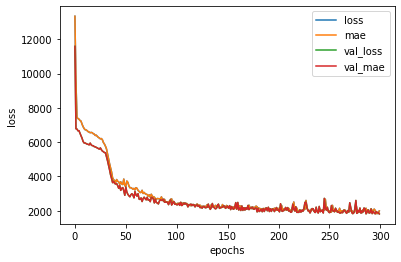

In [47]:
pd.DataFrame(history_value.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


#### EarlyStopping Callback - It is a tensorflow component you can add to your model to stop trainning once it has stopped improving a certain metrics

## Data Preprocessing using - Normalization and Standardization

### check the current scale of our dataset

In [48]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<AxesSubplot:ylabel='Frequency'>

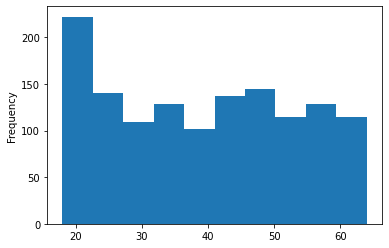

In [49]:
#check scale of age
X["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

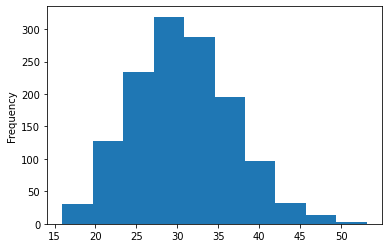

In [50]:
#check scale of bmi
X["bmi"].plot(kind="hist")

In [51]:
## How many children does each group have
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

## Feature Scaling
* **Scale / Normalization:** The method that is commonly used to scale data in neuralnets. It converst all data values to between 0-1 while preserving their original distribution. The Scikit-Learn function used is the **MinMaxScaler.**
* **Standardization:** It transforms the data to have close to normal distribution. However, it reduces the effects of the outliers. The Scikit-Learn function used is the **StandardScaler**

In [52]:
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the medical cost prediction dataset form github repo
insurance_cost = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_cost

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Import some few classes and functions frm SciKit Learn to prepare the data.

In [53]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Create a column Transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),# trun values to btw 0-1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
    #handle_unknown - tells the encoder to ignore all columns its not aware of.
)

#Create X and Y values
X = insurance_cost.drop(labels=["charges"], axis=1)
y = insurance_cost["charges"]


In [54]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#fit the column transformer to only our training data and not the test data because it may lead to data leakage.
#fit - The transformer learns something about our data
#transform - The transformer uses what it learnt to perform transformation

#fit the column transformer to our training data
ct.fit(X_train)

#Tranform our training and test data sets with normalization(MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

### Visualize our new normalized dataset

In [55]:
#Our normalized training datasets will have some extra columns because of
#the one-hot encoding process.
X_train.shape,X_train_normal.shape 

((1070, 6), (1070, 11))

### Build the model on the normalized dataset

In [71]:
tf.random.set_seed(42)

#build the model
model = tf.keras.models.Sequential([
     tf.keras.layers.Dense(8, activation="relu"),
     tf.keras.layers.Dense(16, activation="relu"),
     tf.keras.layers.Dense(32, activation="relu"),
     tf.keras.layers.Dense(64, activation="relu"),
     tf.keras.layers.Dense(128,activation="relu"),
     tf.keras.layers.Dense(128,activation="relu"),
     tf.keras.layers.Dense(256,activation="relu"),
     tf.keras.layers.Dense(1, activation=Non)
], name="model_with_normalized_values")

#compile the model
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.mae,
    metrics=["mae"]
)

#Train the model
model.fit(X_train_normal,y_train, epochs=300, validation_split=0.1)

ValueError: Unknown activation function: leakyrelu

In [69]:
#Evaluate the model
model.evaluate(X_test_normal,y_test)


9/9 [==============================] - 0s 2ms/step - loss: 1368.6082 - mae: 1368.6082


[1368.608154296875, 1368.608154296875]